In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [4]:
data = pd.read_csv("book_reviews_sample.csv")

In [5]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [7]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [8]:
# Pre-processing for sentiment analysis: Don't remove stop words, but remove punctuation
data['reviewText_clean'] = data['reviewText'].str.lower()

In [9]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [13]:
data['reviewText_clean'] = data.apply(lambda x: re.sub(r'([^\w\s])', '', x['reviewText_clean']), axis=1)

In [14]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [16]:
vader_analyzer = SentimentIntensityAnalyzer() # Rule based sentiment analysis

In [17]:
data['vader_sentiment_scores'] = data['reviewText_clean'].apply(lambda review: vader_analyzer.polarity_scores(review)['compound'])

In [18]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_scores
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [19]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']
data['vader_sentiment_labels'] = pd.cut(data['vader_sentiment_scores'], bins=bins, labels=names)



In [25]:
data[::10]

,index,reviewText,rating,reviewText_clean,vader_sentiment_scores,vader_sentiment_labels
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
10,9478,let down. Did not think it was worth the money...,1,let down did not think it was worth the money ...,0.5106,positive
20,9230,"was ok, i read through it fairly fast, do not ...",3,was ok i read through it fairly fast do not li...,0.0116,neutral
30,2910,It was a total waste of my reading pleasure an...,2,it was a total waste of my reading pleasure an...,-0.3582,negative
40,10934,"its not the worse, but it had a childish feel ...",1,its not the worse but it had a childish feel ...,-0.5702,negative
50,8976,I do not like this one please remove it from m...,1,i do not like this one please remove it from m...,0.4749,positive
60,4745,Not Agatha Christie.......Not Ms. Marple.But a...,3,not agatha christienot ms marplebut a good try,0.4404,positive
70,9134,not much there as far as plot or characters......,3,not much there as far as plot or characters mi...,0.6486,positive
80,5496,"True to my word, it was good to the end of the...",5,true to my word it was good to the end of the ...,0.6908,positive
90,4341,this book wasnt very long but very good ! grea...,4,this book wasnt very long but very good great...,0.9073,positive


<Axes: xlabel='vader_sentiment_labels'>

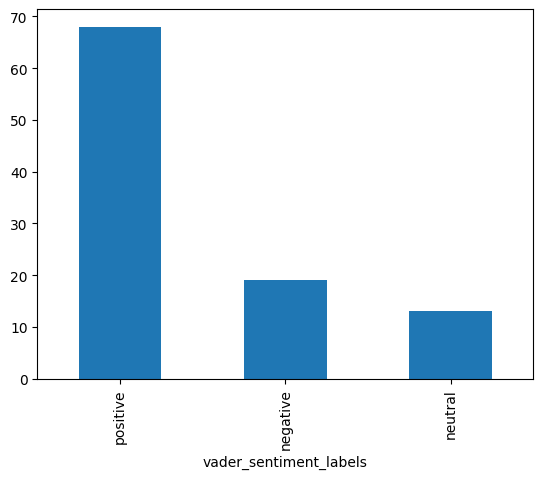

In [26]:
data['vader_sentiment_labels'].value_counts().plot.bar()